Recurrent Mask R-CNN Demo

Ref: https://github.com/cechung/R-RCNN

- Single Object Tracking
- detection module: Matterport implementation Mask R-CNN
- tracking module: 2 LSTM networks

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# need tf 1.15.2
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
# fix AttributeError: 'str' object has no attribute 'decode'
!pip install h5py==2.10.0

In [ ]:
# fix AttributeError: module 'scipy.misc' has no attribute 'imresize'
!pip install scipy==1.2.2

In [ ]:
# go to folder containing LSTM_Mask_RCNN repo and outputs
import os
root = "/content/drive/MyDrive/data/summer-project/LSTM_Mask_RCNN/"
os.chdir(root)
!pwd

/content/drive/MyDrive/data/summer-project/LSTM_Mask_RCNN


In [ ]:
# install requirements
!pip install -r requirements.txt

# Training

In [ ]:
# # go to samples/nucleus folder in LSTM_Mask_RCNN repo
# import os

# root = "/content/drive/MyDrive/data/summer-project/LSTM_Mask_RCNN/samples/nucleus"
# os.chdir(root)
# !pwd

In [ ]:
# !python nucleus.py train --dataset=../../simple-dataset/nucleus --subset=train --weights=imagenet

create single particle dataset

In [ ]:
# !ls
# !unzip phantom.zip -d single-particle-dataset/
# !ls

# import cv2
# import glob
# from PIL import Image 
# from google.colab.patches import cv2_imshow

# for filepath in glob.iglob('single-particle-dataset/nucleus/*.tif'):
#   print(filepath)
#   filename_only = filepath.split(".tif")[0]
#   print(filename_only)
#   im = Image.open(filepath)
#   im.save(filename_only + '.png')  # or 'test.tif'

# testim = cv2.imread('single-particle-dataset/nucleus/000/images/scenePhantoms000.png')
# cv2_imshow(testim * 255)

# %cp -av "simple-dataset/nucleus/stage1_train/0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9" "single-particle-dataset/nucleus/"

create frames to do inference on

In [ ]:
# convert from grayscale to rgb
# fix ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (3,2) and requested shape (2,2)
# import cv2
# import glob

# for filepath in glob.iglob('demo_video_nucleus/frames/*.jpg'):
#   print(filepath)

#   img = cv2.imread(filepath, cv2.IMREAD_UNCHANGED)
#   print(img.shape)
#   backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
#   print(backtorgb.shape)

#   cv2.imwrite(filepath, backtorgb)

In [ ]:
# # convert rgba to rgb
# import glob
# import PIL.Image

# for filepath in glob.iglob('demo_video_nucleus/frames/*.png'):
#   print(filepath)
#   rgba_image = PIL.Image.open(filepath)
#   rgb_image = rgba_image.convert('RGB')
#   rgb_image.save(filepath, "PNG")

demo_video_nucleus/frames/0007.jpg


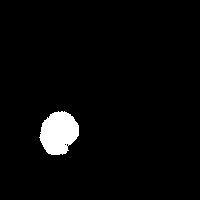

demo_video_nucleus/all-masks/0007.png
demo_video_nucleus/frames/0010.jpg


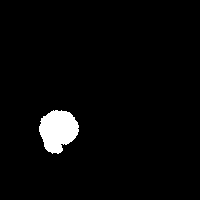

demo_video_nucleus/all-masks/0010.png
demo_video_nucleus/frames/0009.jpg


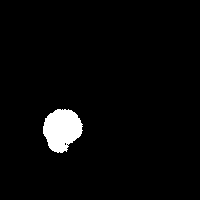

demo_video_nucleus/all-masks/0009.png
demo_video_nucleus/frames/0005.jpg


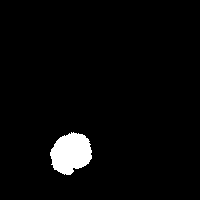

demo_video_nucleus/all-masks/0005.png
demo_video_nucleus/frames/0003.jpg


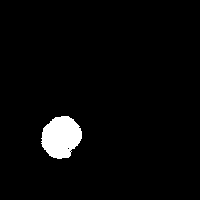

demo_video_nucleus/all-masks/0003.png
demo_video_nucleus/frames/0006.jpg


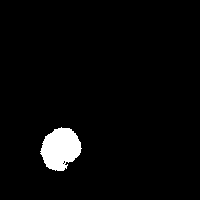

demo_video_nucleus/all-masks/0006.png
demo_video_nucleus/frames/0008.jpg


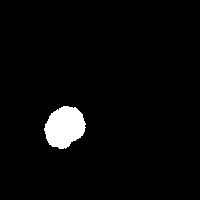

demo_video_nucleus/all-masks/0008.png
demo_video_nucleus/frames/0002.jpg


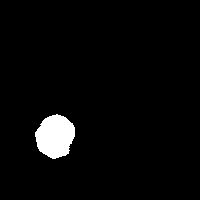

demo_video_nucleus/all-masks/0002.png
demo_video_nucleus/frames/0011.jpg


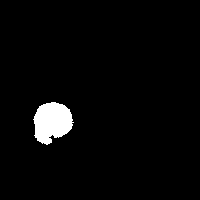

demo_video_nucleus/all-masks/0011.png
demo_video_nucleus/frames/0004.jpg


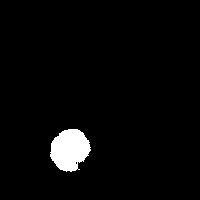

demo_video_nucleus/all-masks/0004.png
demo_video_nucleus/frames/0012.jpg


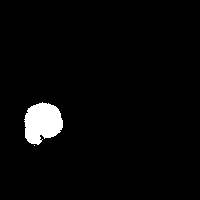

demo_video_nucleus/all-masks/0012.png
demo_video_nucleus/frames/0013.jpg


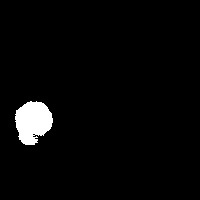

demo_video_nucleus/all-masks/0013.png
demo_video_nucleus/frames/0014.jpg


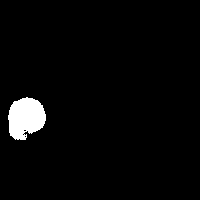

demo_video_nucleus/all-masks/0014.png
demo_video_nucleus/frames/0001.jpg


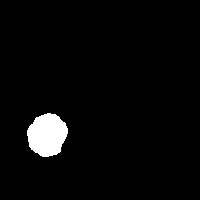

demo_video_nucleus/all-masks/0001.png


In [ ]:
import cv2
import glob
from PIL import Image 
from google.colab.patches import cv2_imshow
import numpy as np


# # create demo png masks from jpg images
# mask_dir = 'demo_video_nucleus/all-masks/'
# for filepath in glob.iglob('demo_video_nucleus/frames/*.jpg'):
#   print(filepath)
#   img = cv2.imread(filepath)
#   # cv2_imshow(img)
#   img[img <= 50] = 0
#   img[img > 50] = 255
#   cv2_imshow(img)
#   filename_only = filepath.split("frames/")[1].replace(".jpg", "")
#   # print(filename_only)
#   print(mask_dir + filename_only + ".png")
# #   cv2.imwrite(mask_dir + filename_only + ".png", img)

# # check the shape of images
# import cv2
# import glob
# from PIL import Image 
# from google.colab.patches import cv2_imshow
# import numpy as np
# for filepath in glob.iglob('single-particle-dataset/nucleus/stage1_test/0000/images/*.png'):
#   print(filepath)
#   img = cv2.imread(filepath)
#   print(img.shape)

# for filepath in glob.iglob('demo_video_nucleus/frames/stage1_test/0001/images/*.png'):
#   print(filepath)
#   img = cv2.imread(filepath)
#   print(img.shape)

# for filepath in glob.iglob('single-particle-dataset/nucleus/stage1_test/0000/masks/*.png'):
#   print(filepath)
#   img = cv2.imread(filepath)
#   print(img.shape)
#   break

# for filepath in glob.iglob('demo_video_nucleus/frames/stage1_test/0001/masks/*.png'):
#   print(filepath)
#   img = cv2.imread(filepath)
#   print(img.shape)

# Inference

## inference demos of R-RCNN

In [ ]:
# demo mask r-cnn
# !python demo_mrcnn.py

In [ ]:
# # go to samples/nucleus folder in LSTM_Mask_RCNN repo
import os
root = "/content/drive/MyDrive/data/summer-project/LSTM_Mask_RCNN/samples/nucleus"
os.chdir(root)
!pwd
# import nucleus is only available in samples/nucleus directory
import nucleus

import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
LOGS_DIR = os.path.join(ROOT_DIR, "logs")

# Dataset directory
# DATASET_DIR = os.path.join(ROOT_DIR, "single-particle-dataset/nucleus")
DATASET_DIR = os.path.join(ROOT_DIR, "demo_video_nucleus/frames")

# Inference Configuration
config = nucleus.NucleusInferenceConfig()
config.display()

# Device to load the neural network on.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# Only inference mode is supported right now
TEST_MODE = "inference"

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax

# Load validation dataset
dataset = nucleus.NucleusDataset()
dataset.load_nucleus(DATASET_DIR, "stage1_test")

dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference",
                              model_dir=LOGS_DIR,
                              config=config)

# Path to a specific weights file
weights_path = "../../kaggle_bowl.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

# Run object detection
results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

# # Display results
# r = results[0]
# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

# # Compute AP over range 0.5 to 0.95 and print it
# utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
#                        r['rois'], r['class_ids'], r['scores'], r['masks'],
#                        verbose=1)

# visualize.display_differences(
#     image,
#     gt_bbox, gt_class_id, gt_mask,
#     r['rois'], r['class_ids'], r['scores'], r['masks'],
#     dataset.class_names, ax=get_ax(),
#     show_box=False, show_mask=False,
#     iou_threshold=0.5, score_threshold=0.5)


# regular detection function
img_name = str(image_id) + ".jpg" #".png"
import utils.utils as utils
import utils.visualize as visualize
coco_class_names = ['BG', 'cell']
RESULT_DIR = os.path.join(ROOT_DIR, "mrcnn_result")
regular_results = model.detect([image], verbose=1)
reg_r = regular_results[0]
# print("reg r:", reg_r)
# Visualize results
visualize.save_image(image, img_name, reg_r['rois'], reg_r['masks'],
  reg_r['class_ids'], reg_r['scores'], coco_class_names,
  filter_classs_names=None, scores_thresh=0.1, 
  save_dir=RESULT_DIR, mode=1)

/content/drive/MyDrive/data/summer-project/LSTM_Mask_RCNN/samples/nucleus


Using TensorFlow backend.



Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

RuntimeError: ignored

In [ ]:
# demo r-rcnn
# !python demo_rrcnn.py

# inference from regular mask r-cnn

In [ ]:
# # go to samples/nucleus folder in LSTM_Mask_RCNN repo
import os

root = "/content/drive/MyDrive/data/summer-project/LSTM_Mask_RCNN/samples/nucleus"
os.chdir(root)
!pwd

# import nucleus is only available in samples/nucleus directory
import nucleus

/content/drive/MyDrive/data/summer-project/LSTM_Mask_RCNN/samples/nucleus


In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
LOGS_DIR = os.path.join(ROOT_DIR, "logs")

In [ ]:
# Dataset directory
# DATASET_DIR = os.path.join(ROOT_DIR, "datasets/nucleus")
# DATASET_DIR = os.path.join(ROOT_DIR, "simple-dataset/nucleus")

# single image dataset
DATASET_DIR = os.path.join(ROOT_DIR, "single-particle-dataset/nucleus")

# Inference Configuration
config = nucleus.NucleusInferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet50
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        400
DETECTION_MIN_CONFIDENCE       0
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  512
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  512
IMAGE_MIN_SCALE                2.0
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE               

## Notebook Preferences

In [ ]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# Only inference mode is supported right now
TEST_MODE = "inference"

In [ ]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    return ax

## Load Validation Dataset

In [ ]:
# Load validation dataset
dataset = nucleus.NucleusDataset()
# dataset.load_nucleus(DATASET_DIR, "val")

# load single image dataset
dataset.load_nucleus(DATASET_DIR, "stage1_test")

dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 1
Classes: ['BG', 'nucleus']


## Load Model

In [ ]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference",
                              model_dir=LOGS_DIR,
                              config=config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [ ]:
# Path to a specific weights file
# weights_path = "/path/to/mask_rcnn_nucleus.h5"
weights_path = "../../kaggle_bowl.h5"

# Or, load the last model you trained
# weights_path = model.find_last()

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  ../../kaggle_bowl.h5


## Run Detection

image ID: nucleus.0000 (0) 0000
Original image shape:  [256 256   3]
Processing 1 images
image                    shape: (512, 512, 3)         min:    1.00000  max:  144.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min:    1.00000  max:  144.00000  uint8
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  float64
anchors                  shape: (1, 65472, 4)         min:   -0.17712  max:    1.05188  float32

gt_class_id              shape: (27,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (27, 4)               min:    0.00000  max:  512.00000  int32
gt_mask                  shape: (512, 512, 27)        min:    0.00000  max:    1.00000  bool
AP @0.50:	 0.654
AP @0.55:	 0.518
AP @0.60:	 0.462
AP @0.65:	 0.298
AP @0.70:	 0.212
AP @0.75:	 0.175
AP @0.80:	 0.080
AP @0.85:	 0.008
AP @0.90:	 0.000
AP @0.95:	 0.000
AP @0.50-0.95:	 0.241


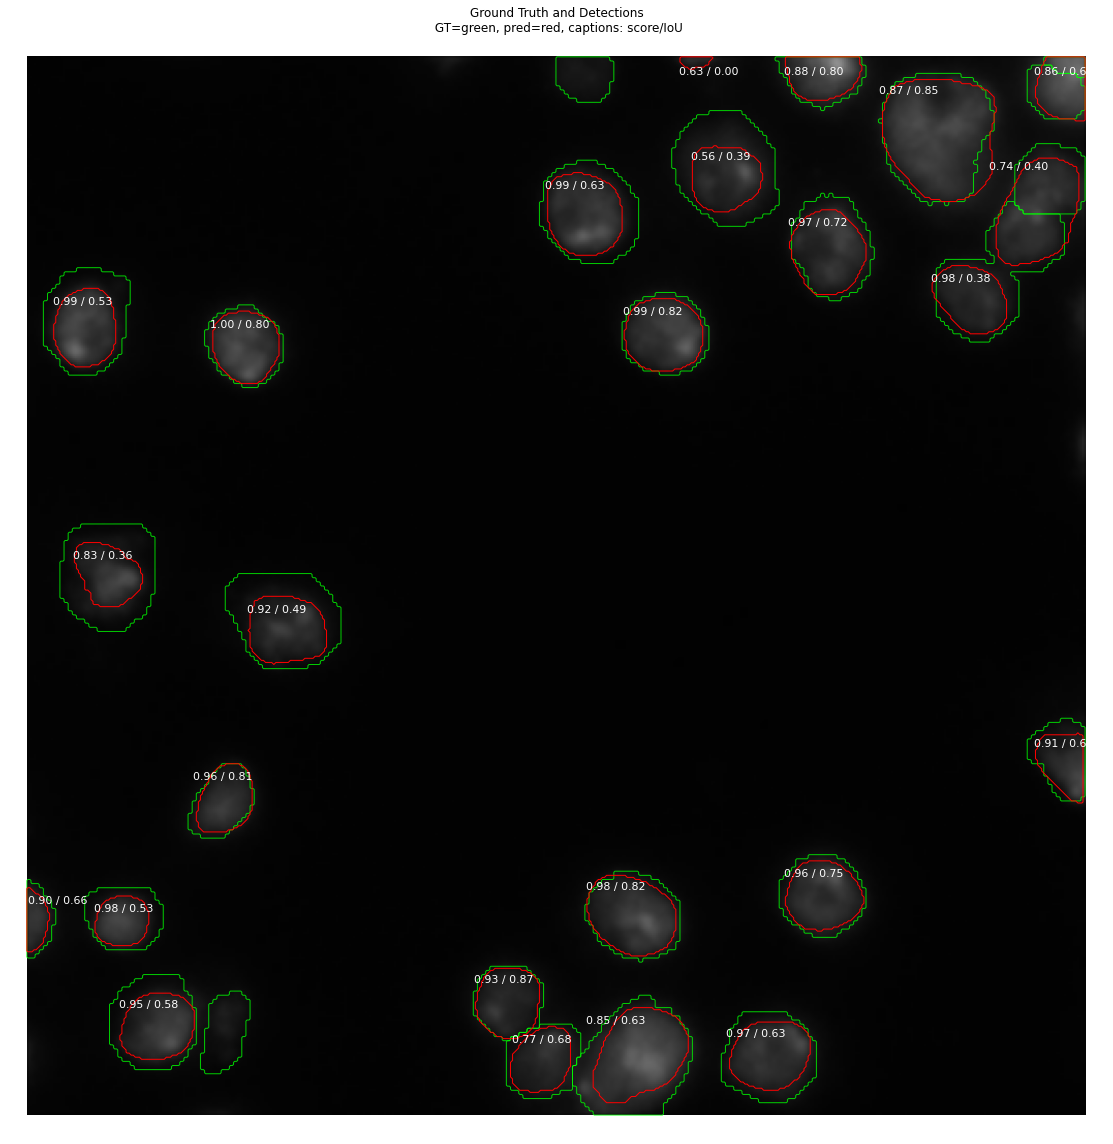

In [ ]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))
print("Original image shape: ", modellib.parse_image_meta(image_meta[np.newaxis,...])["original_image_shape"][0])

# Run object detection
results = model.detect_molded(np.expand_dims(image, 0), np.expand_dims(image_meta, 0), verbose=1)

# Display results
r = results[0]
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

# Compute AP over range 0.5 to 0.95 and print it
utils.compute_ap_range(gt_bbox, gt_class_id, gt_mask,
                       r['rois'], r['class_ids'], r['scores'], r['masks'],
                       verbose=1)

visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    dataset.class_names, ax=get_ax(),
    show_box=False, show_mask=False,
    iou_threshold=0.5, score_threshold=0.5)

In [ ]:
# # demo mask_rcnn
# import os
# import sys
# import random
# import math
# import numpy as np
# import skimage.io
# import matplotlib
# import matplotlib.pyplot as plt
# import time

# import utils.utils as utils
# import utils.visualize as visualize
# import coco
# import detection_module.detect_model as detectlib

# # COCO Class names
# # Index of the class in the list is its ID. For example, to get ID of
# # the teddy bear class, use: class_names.index('teddy bear')
# coco_class_names = ['BG', 'cell']

# # Root directory of the project
# ROOT_DIR = os.getcwd()
# # Path to trained weights file
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "kaggle_bowl.h5")
# # Directory to save logs and trained model
# MODEL_DIR = os.path.join(ROOT_DIR, "logs")
# # Directory of images to run detection on
# IMAGE_DIR = os.path.join("single-particle-dataset/nucleus", "stage1_test", "0000", "images")
# # Directory of MRCNN for examined
# RESULT_DIR = os.path.join(ROOT_DIR, "mrcnn_result")
# if not os.path.exists(RESULT_DIR):
# 	os.makedirs(RESULT_DIR)


# class InferenceConfig(coco.CocoConfig):
#   # Set batch size to 1 since we'll be running inference on
#   # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
#   GPU_COUNT = 1
#   IMAGES_PER_GPU = 1
#   # IMAGE_MIN_DIM = 480
#   # IMAGE_MAX_DIM = 640
#   IMAGE_MIN_DIM = 256
#   IMAGE_MAX_DIM = 256
#   # IMAGE_RESIZE_MODE = "pad64"
#   # display if confidence > 0.5
#   # DETECTION_MIN_CONFIDENCE = 0.5

# config = InferenceConfig()
# config.display()

# # Create model object in inference mode.
# model = detectlib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
# # Load weights trained on MS-COCO
# model.load_weights(COCO_MODEL_PATH, by_name=True, exclude=[ "mrcnn_class_logits", "mrcnn_bbox_fc", "mrcnn_bbox", "mrcnn_mask"])

# # Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[2]
# file_names.sort()

# # Initial total run time
# total_mrcnn_time = 0
# # The number of frames
# frame_number = len(file_names)

# for img_name in file_names:
#   print("Image name: %s" % (img_name))
#   # Time start
#   mrcnn_start = time.time()
#   image = skimage.io.imread(os.path.join(IMAGE_DIR, img_name))

#   if image.shape[-1] == 4:
#     image = image[..., :3]
#     print("removed alpha channel")
  
#   # Run detection
#   results = model.detect([image], verbose=1)
#   r = results[0]
#   # Time end
#   mrcnn_end = time.time()
#   total_mrcnn_time = total_mrcnn_time + (mrcnn_end - mrcnn_start)

# # Visualize results
# visualize.save_image(image, img_name, r['rois'], r['masks'],
# r['class_ids'], r['scores'], coco_class_names,
# filter_classs_names=None, scores_thresh=0.1, 
# save_dir=RESULT_DIR, mode=1)

# fps = frame_number / total_mrcnn_time
# print("\n# ------------------------------------ #")
# print("# Processed Frames: %d" % frame_number)
# print("# Cost Time: %.3f" % total_mrcnn_time)
# print("# FPS: %.1f" % fps)
# print("# ------------------------------------ #\n")


Configurations:
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  800
IMAGE_PADDING                  True
IMAGE_RESIZE_MODE              pad64
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                    81
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE   